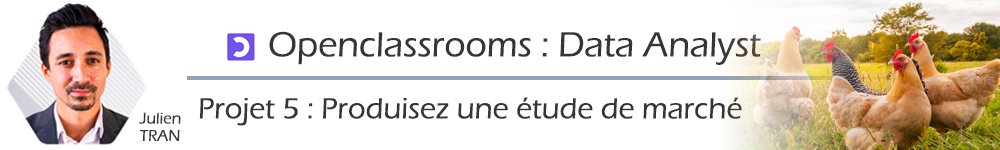

### Mission 3 : Caractérisation des clusters

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

### Sommaire // mission 3 🐔

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Caractérisation des clusters](#3)
    * [3.1.Jointure des tables Data_pays_2018 et Clusters_2018](#3.1)
    * [3.2.Représentation graphique des clusters](#3.2)
    * [3.3.Variation de population](#3.3)
    * [3.4.PIB](#3.4)
    * [3.5.Ratio protéines animale/quantité tot protéines](#3.5)
    * [3.6.Disponibilité alimentaire en prot/hab (g)](#3.6)
    * [3.7.Disponibilité alimentaire en cal/hab (cal)](#3.7)
    * [3.8.Taux de dépendance aux importations (%)](#3.8)
    * [3.9.Taux d'autosuffisance en volaille (%)](#3.9)
    * [3.10.Distance par rapport à la France](#3.10)
* [4.Interpretations et choix d'un cluster](#4)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.patches import Patch

#Je definis le nombre de lignes max affichées sur None

pd.set_option("max_rows", None) 
pd.set_option("display.precision",5)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv

Data_pays_km_2018 = pd.read_csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_km_2018.csv")
Data_pays_km_2018_2 = pd.read_csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_km_2018_2.csv")

Clusters_2018_V3 = pd.read_csv("C:/Users/33643/Desktop/P5/CSV/Clusters_2018_V3.csv")

#J'affiche une phrase si l'import est reussi

print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.Caractérisation des clusters <a class="anchor" id="3"></a>

## 3.1.Jointure des tables Data_pays_2018 et Clusters_2018 <a class="anchor" id="3.1"></a>

In [3]:
#Je renomme ma colonne title en Zone dans la table Clusters_2018, puis je merge les deux tables

Clusters_2018_V3 = Clusters_2018_V3.rename(columns ={'country':'Zone'})

#Data_pays_clusters_2018_V2 = pd.merge(Data_pays_km_2018, Clusters_2018_V2, on= 'Zone')
#Data_pays_clusters_2018_V2_2 = pd.merge(Data_pays_km_2018_2, Clusters_2018_V2, on= 'Zone')
Data_pays_clusters_2018_V3 = pd.merge(Data_pays_km_2018, Clusters_2018_V3, on= 'Zone')

#Data_pays_clusters_2018_V2 = Data_pays_clusters_2018_V2.sort_values(by = [('clusters')], ascending = True).dropna(axis=0)
#Data_pays_clusters_2018_V2_2 = Data_pays_clusters_2018_V2_2.sort_values(by = [('clusters')], ascending = True).dropna(axis=0)
Data_pays_clusters_2018_V3 = Data_pays_clusters_2018_V3.sort_values(by = [('clusters')], ascending = True).dropna(axis=0)

Data_pays_clusters_2018_V3.head()

,Zone,Var_pop(%),Prot_tot(g/hab/j),Ratio_prot(%),Kcal_tot(hab/j),PIB($),Dep_import(%),Autosuf_prod(%),km_from_FR,clusters
83,Kiribati,4.50450,73.57,48.98736,3078,1698.24258,100.00000,50.00000,15168.83,1
62,Guinée,8.58992,57.40,19.79094,2746,878.60139,159.25926,48.14815,4189.55,1
65,Haïti,3.99215,49.62,21.34220,2121,834.94718,101.04167,9.37500,7318.59,1
68,Îles Salomon,8.29187,53.14,28.92360,2415,2000.52302,166.66667,0.00000,15440.00,1
72,Iraq,8.04300,65.53,22.23409,2608,5606.79931,71.38264,28.93891,3777.46,1


In [4]:
#Data_pays_clusters_2018_V2.to_csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_clusters_2018_V2.csv", index=False,encoding='utf-8-sig')
#Data_pays_clusters_2018_V2_2.to_csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_clusters_2018_V2_2.csv", index=False,encoding='utf-8-sig')
Data_pays_clusters_2018_V3.to_csv("C:/Users/33643/Desktop/P5/CSV/Data_pays_clusters_2018_V3.csv", index=False,encoding='utf-8-sig')

## 3.2.Représentation graphique des clusters <a class="anchor" id="3.2"></a>

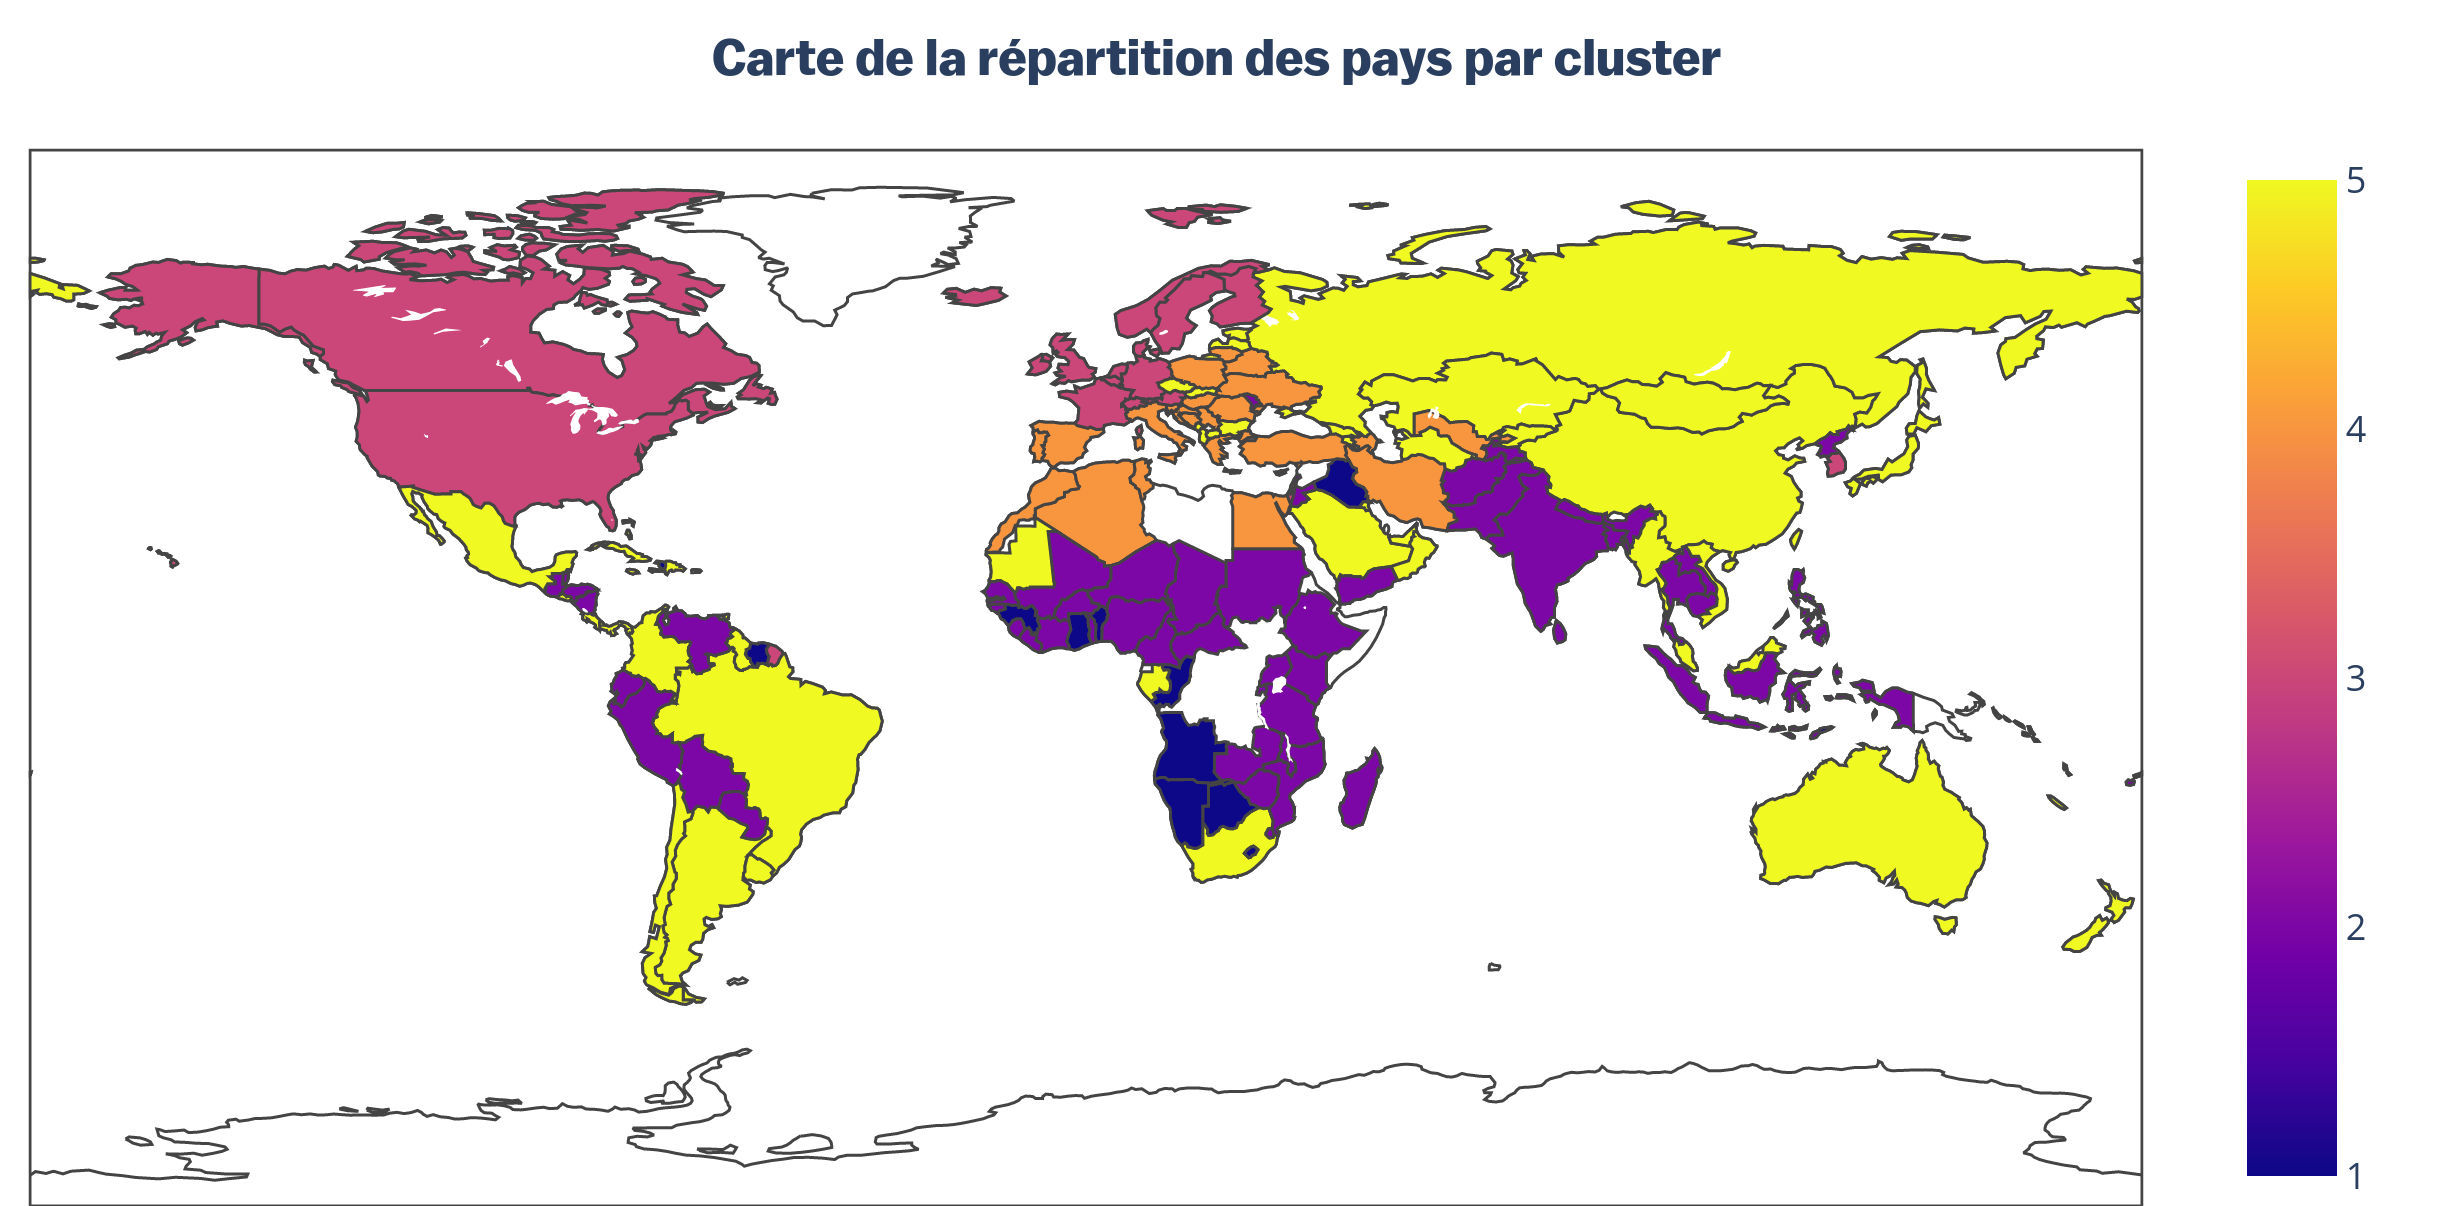

Essayons de caractériser chacun de ces clusters en regardant la valeur de leurs centroïde pour chaque variable. Les centroïdes représentent tout simplement la valeur moyenne d’une variable pour un cluster donné.

## 3.3.Variation de population <a class="anchor" id="3.3"></a>

In [5]:
means_pop = Data_pays_clusters_2018_V3.groupby('clusters')['Var_pop(%)'].mean()
means_pop

clusters
1    6.55063
2    6.03410
3    2.45713
4    0.95611
5    2.61527
Name: Var_pop(%), dtype: float64

Text(0.5, 1.0, 'Variation de population(%)')

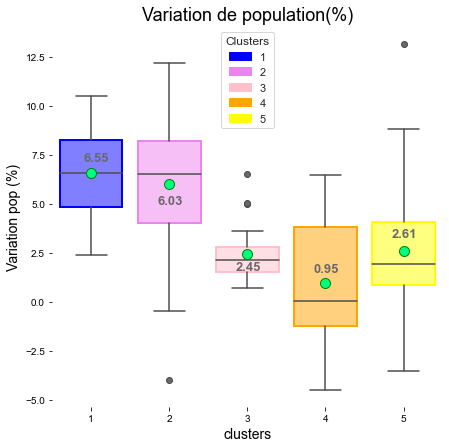

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Var_pop(%)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Variation pop (%)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.1, 7.2, '6.55', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.85, 5.0, '6.03', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.85, 1.6, '2.45', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 1.5, '0.95', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 3.3, '2.61', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Variation de population(%)", size=18)

- Les pays des clusters 1 et 2 ont une forte variation (moyenne = 6,55% et 6.03%) de la population entre 2015 et 2018
- Les pays des cluster 3 et 5 ont une variation moyenne (moyenne = 2.45% et 2.61%) de population entre 2015 et 2018
- Les pays du clusters 4 a une faible variation (moyenne = 0,95%) de la population entre 2015 et 2018

## 3.4.PIB <a class="anchor" id="3.4"></a>

In [7]:
means_pib = Data_pays_clusters_2018_V3.groupby('clusters')['PIB($)'].mean()
means_pib

clusters
1     2888.09611
2     2399.16010
3    60840.63395
4    12293.92682
5    15249.79438
Name: PIB($), dtype: float64

Text(0.5, 1.0, 'PIB($) par clusters')

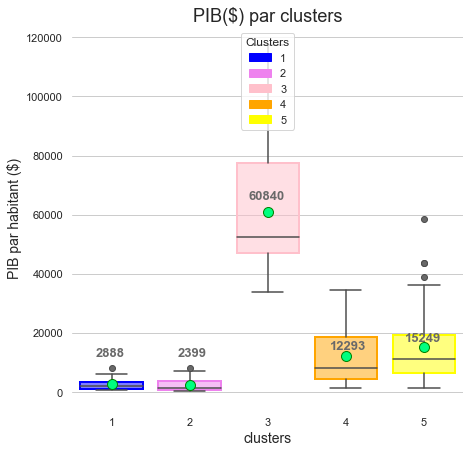

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='PIB($)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("PIB par habitant ($)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.2, 12000, '2888', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.85, 12000, '2399', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.75, 65000, '60840', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.8, 14500, '12293', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.75, 17000, '15249', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("PIB($) par clusters", size=18)

- Les pays des clusters 1 et 2 ont un PIB faible (moyenne = 2888\\$ et 2399\\$)
- Les pays des cluster 4 et 5 ont un PIB moyen (moyenne = 12,3k\\$ et 15,2k\\$)
- Les pays du cluster 3 ont un PIB elevé (moyenne = 60,8k\\$)

Les pays avec le plus faible PIB par habitant (clusters 1 et 2) ont aussi la plus forte variation de population entre 2015 et 2018.

## 3.5.Ratio protéines animale/quantité tot protéines <a class="anchor" id="3.5"></a>

In [9]:
means_prot1 = Data_pays_clusters_2018_V3.groupby('clusters')['Ratio_prot(%)'].mean()
means_prot1

clusters
1    31.86883
2    27.42056
3    62.08488
4    45.83468
5    52.57263
Name: Ratio_prot(%), dtype: float64

Text(0.5, 1.0, 'Ratio protéines animale/quantité tot protéines par clusters')

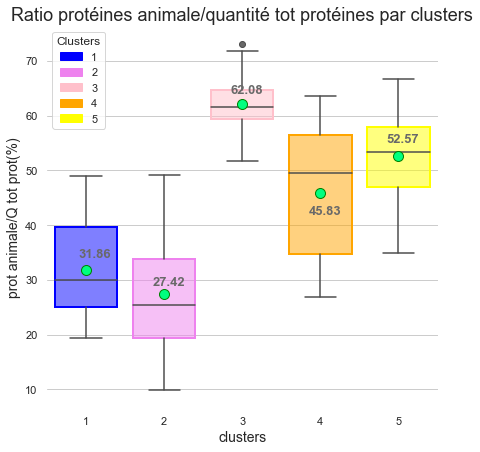

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Ratio_prot(%)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("prot animale/Q tot prot(%)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.10, 34, '31.86', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.85, 29, '27.42', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.85, 64, '62.08', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 42, '45.83', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 55, '52.57', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper left',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Ratio protéines animale/quantité tot protéines par clusters", size=18)

- Les pays des clusters 1 et 2 ont ratio faible (moyenne = 31,86% et 27,42%)
- Les pays des cluster 3, 4 et 5 ont un ratio elevé (médiane = 62,08%, 45,83% et 52,57%)

## 3.6.Disponibilité alimentaire en prot/hab (g) <a class="anchor" id="3.6"></a>

In [11]:
means_prot2 = Data_pays_clusters_2018_V3.groupby('clusters')['Prot_tot(g/hab/j)'].mean()
means_prot2

clusters
1     61.57278
2     62.47000
3    111.90600
4     99.69318
5     88.86304
Name: Prot_tot(g/hab/j), dtype: float64

Text(0.5, 1.0, 'Disponibilité alimentaire en prot/hab (g) par clusters')

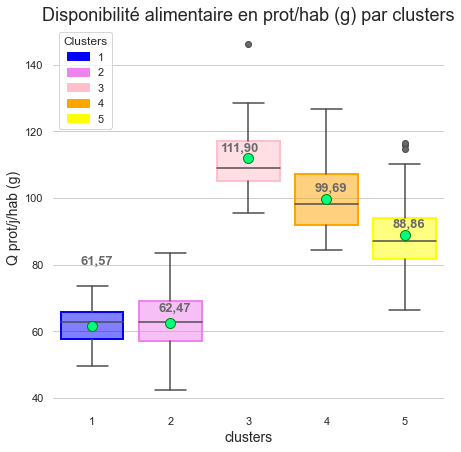

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Prot_tot(g/hab/j)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Q prot/j/hab (g)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.15, 80, '61,57', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.85, 66, '62,47', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.65, 114, '111,90', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 102, '99,69', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 91, '88,86', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper left',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Disponibilité alimentaire en prot/hab (g) par clusters", size=18)

- Les pays des clusters 1 et 2 ont une disponibilité alimentaire en protéine par habitant faible (moyenne =61,57g et 64,47g)
- Les pays des cluster 3, 4 et 5 ont une disponibilité alimentaire en protéine par habitant elevé (moyenne =111,90g, 99,69g et 88,96g)

Sans surprises les pays des clusters 1 et 2 ont la plus faible disponibilité alimentaire en protéine par habitant.

## 3.7.Disponibilité alimentaire en cal/hab (cal) <a class="anchor" id="3.7"></a>

In [13]:
means_cal = Data_pays_clusters_2018_V3.groupby('clusters')['Kcal_tot(hab/j)'].mean()
means_cal

clusters
1    2537.44444
2    2449.96154
3    3485.40000
4    3306.27273
5    2991.32143
Name: Kcal_tot(hab/j), dtype: float64

Text(0.5, 1.0, 'Disponibilité alimentaire en cal/hab (cal) par clusters')

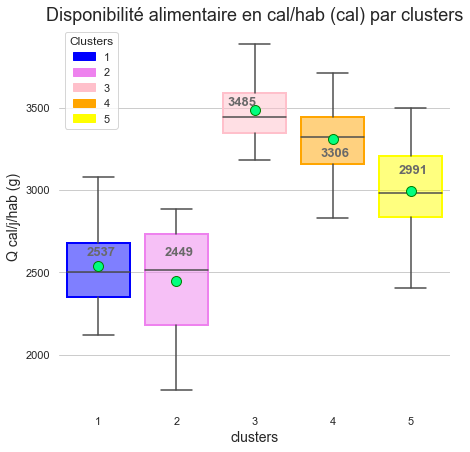

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Kcal_tot(hab/j)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Q cal/j/hab (g)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.15, 2600, '2537', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.85,2600, '2449', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.65, 3510, '3485', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 3200, '3306', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 3100, '2991', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper left',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Disponibilité alimentaire en cal/hab (cal) par clusters", size=18)

- Les pays des clusters 1 et 2 ont une disponibilité alimentaire en protéine par habitant faible (moyenne =2537cal et 2449cal)
- Les pays des cluster 3, 4 et 5 ont une disponibilité alimentaire en protéine par habitant elevé (moyenne =3485cal, 3306cal et 2991cal)

## 3.8.Taux de dépendance aux importations (%) <a class="anchor" id="3.8"></a>

In [15]:
means_dep = Data_pays_clusters_2018_V3.groupby('clusters')['Dep_import(%)'].mean()
means_dep

clusters
1    113.58769
2     16.44525
3     71.96241
4     17.68864
5     57.71656
Name: Dep_import(%), dtype: float64

Text(0.5, 1.0, 'Taux de dépendance aux importations(%) par clusters')

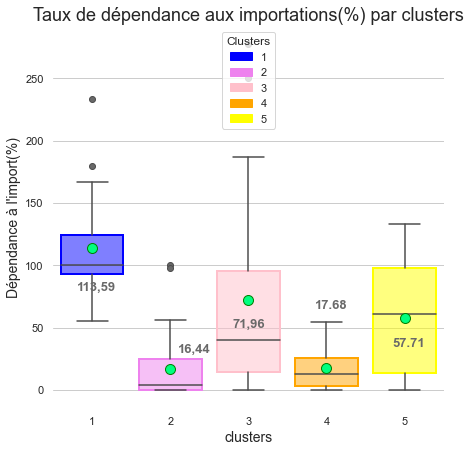

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Dep_import(%)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Dépendance à l'import(%)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.2, 80, '113,59', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.1, 30, '16,44', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.8, 50, '71,96', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 65, '17.68', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 35, '57.71', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Taux de dépendance aux importations(%) par clusters", size=18)

- Les pays des clusters 1 ont un taux de dépendance aux importations tres elevé (moyenne = 113,59%)
- Les pays des cluster 2 et 4 ont un taux de dépendance aux importations faible (moyenne = 16,44% et 17,68%)
- Les pays des cluster 3 et 5 ont un taux de dépendance aux importations plutot elevé (moyenne = 71,96% et 57,71%)

## 3.9.Taux d'autosuffisance en volaille (%) <a class="anchor" id="3.9"></a>

In [17]:
means_prod = Data_pays_clusters_2018_V3.groupby('clusters')['Autosuf_prod(%)'].mean()
means_prod

clusters
1     24.90798
2     97.66208
3    112.89170
4    120.73809
5     57.96325
Name: Autosuf_prod(%), dtype: float64

Text(0.5, 1.0, "Taux d'autosuffisance en volaille(%) par clusters")

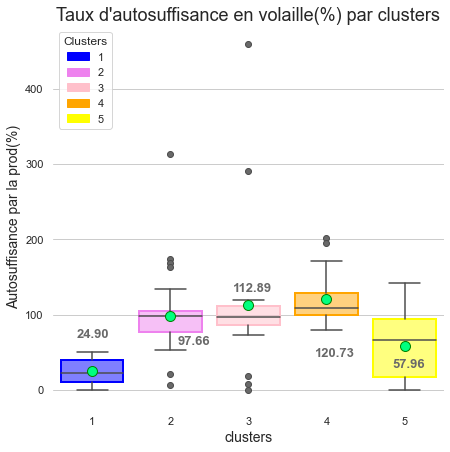

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='Autosuf_prod(%)',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Autosuffisance par la prod(%)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.2, 70, '24.90', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.1, 60, '97.66', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.8, 130, '112.89', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 44, '120.73', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 30, '57.96', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper left',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Taux d'autosuffisance en volaille(%) par clusters", size=18)

- Les pays des clusters 1 et 4 ont un taux d'autosufficance en volaille faible (moyenne = 32.8%, 33%)
- Les pays des cluster 2, 3 et 5 ont un taux d'autosufficance en volaille elevé (moyenne = 104.6%, 103% et 90.2%)

## 3.10.Distance par rapport à la France <a class="anchor" id="3.10"></a>

In [19]:
means_prod = Data_pays_clusters_2018_V3.groupby('clusters')['km_from_FR'].mean()
means_prod

clusters
1    7831.38611
2    6837.43154
3    3121.70000
4    2021.70409
5    7136.56893
Name: km_from_FR, dtype: float64

Text(0.5, 1.0, 'Distance par rapport à la France par clusters')

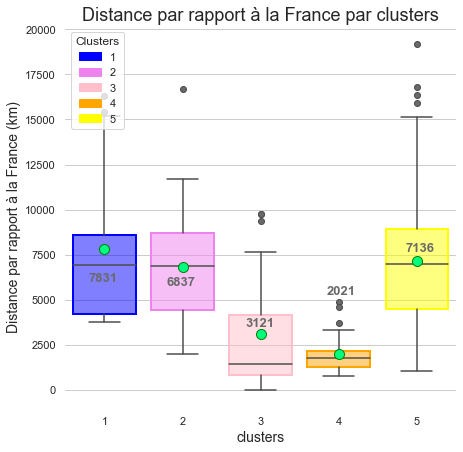

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))

#my_pal = {"yellow", "blue","violet","pink", "orange"}
#,palette=my_pal

sns.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sns.boxplot(x='clusters', y='km_from_FR',data=Data_pays_clusters_2018_V3,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Distance par rapport à la France (km)", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('pink'), mybox.set_edgecolor('pink'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('orange'), mybox.set_edgecolor('orange'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('yellow'), mybox.set_edgecolor('yellow'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.2, 6000, '7831', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.8, 5800, '6837', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.8, 3500, '3121', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.85, 5300, '2021', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.85, 7700, '7136', fontsize=13, color='dimgrey',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper left',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Distance par rapport à la France par clusters", size=18)

- Les pays des clusters 1, 2 et 5 ont un distance par rapport à la France elevé (moyenne = 7831 km, 6837 km, et 7136 km)
- Les pays des cluster 3 et 4 ont un distance par rapport à la France faible (moyenne = 3121 km et 2021 km)

## 4.Interpretations et choix d'un cluster <a class="anchor" id="4"></a>

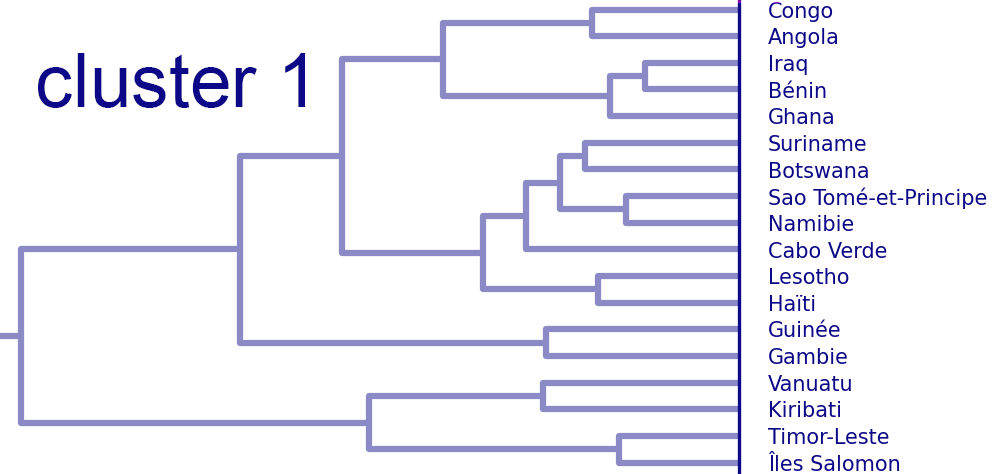

Pays africains en majorité, faible PIB par habitant, distance/France elevée, disponibilités alimentaires faible, consommation de viande faible, et evolution de la population elevée.

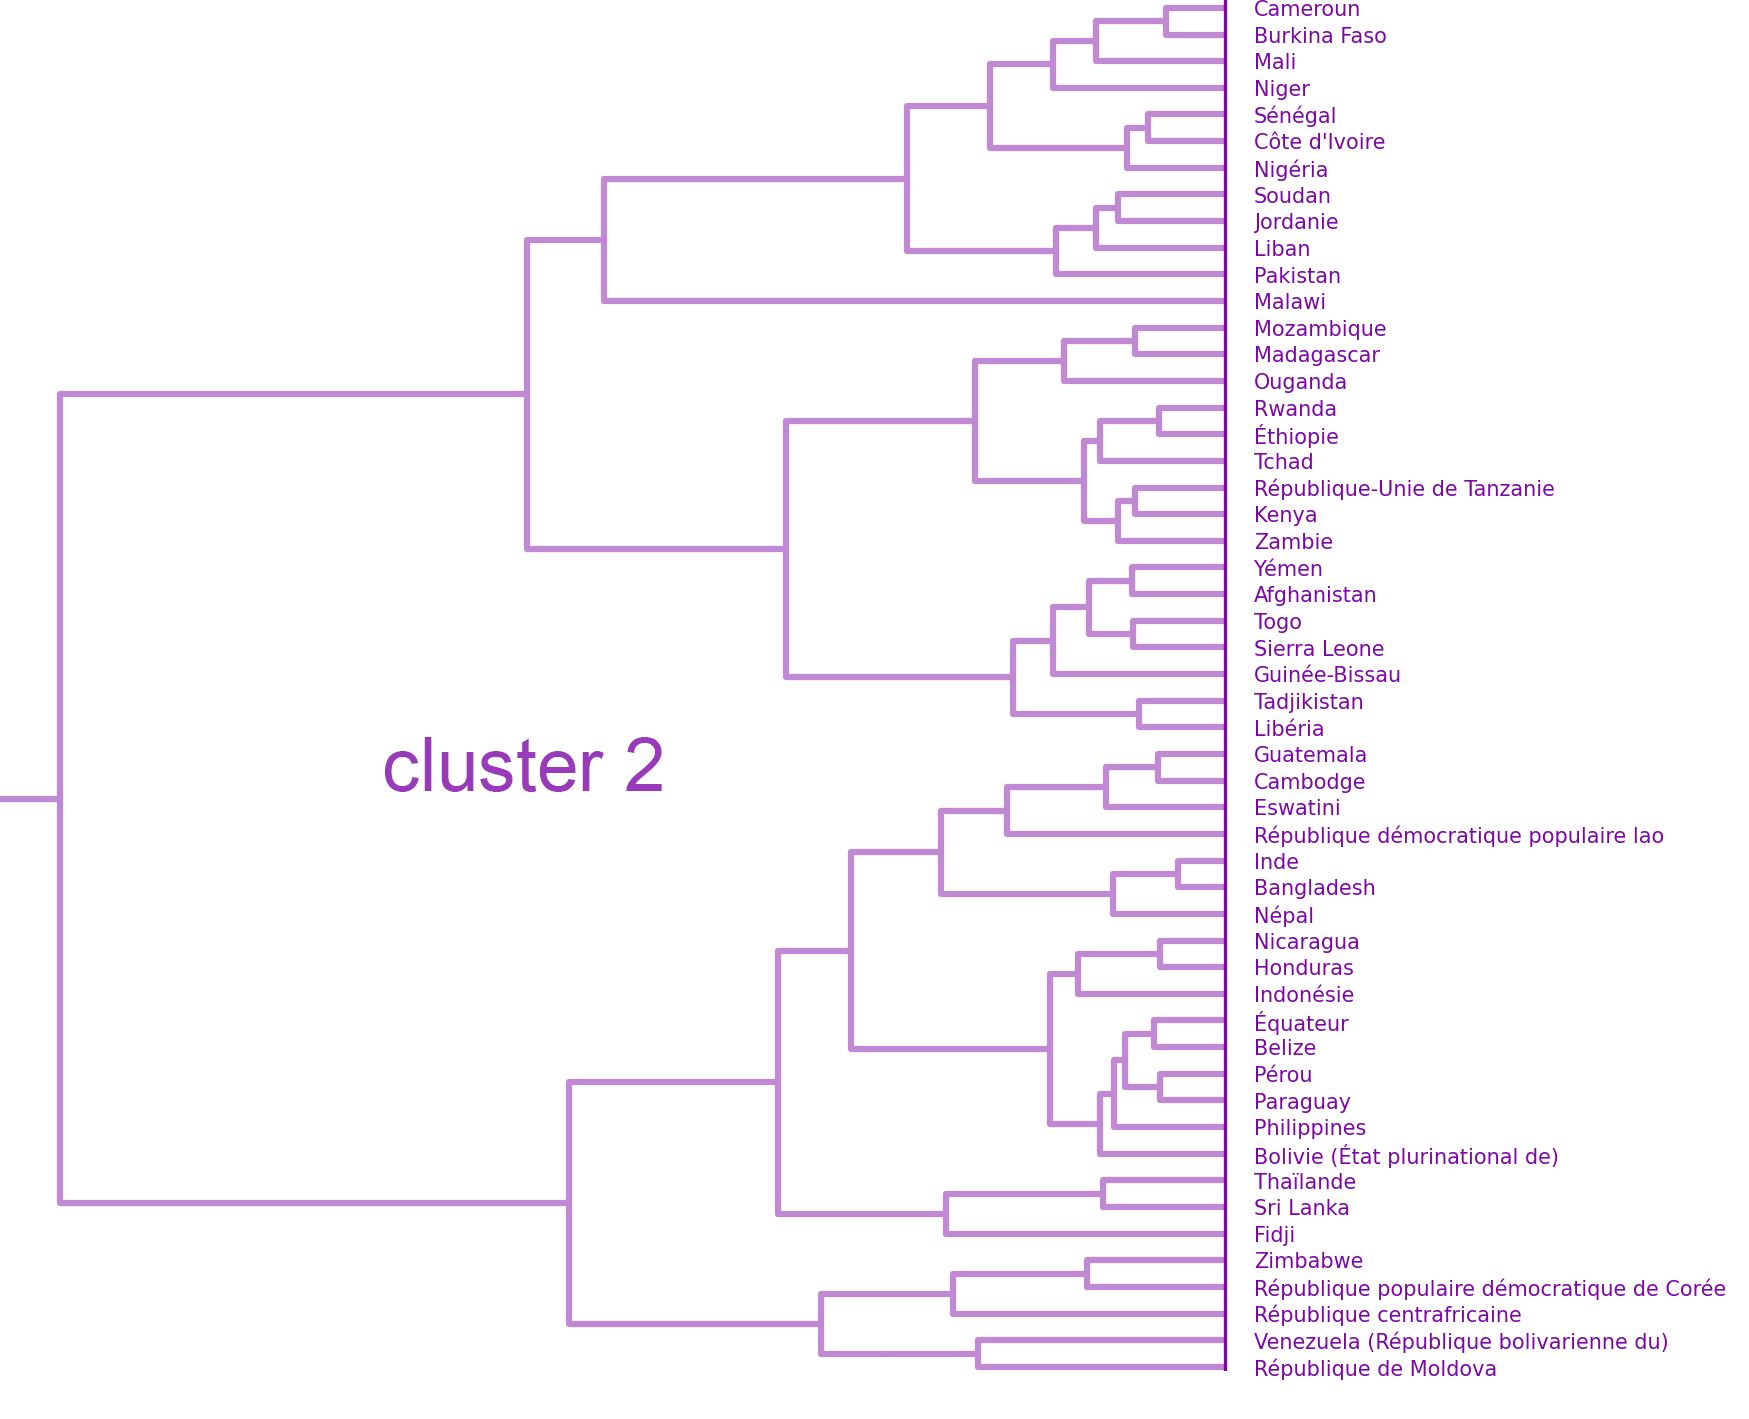

Pays africains, asiatiques du sud et d'amérique du sud, faible PIB par habitant, distance/France elevée, disponibilités alimentaires faible, consommation de viande faible, évolution de la population elevée, et faible dépendance à l'importation.

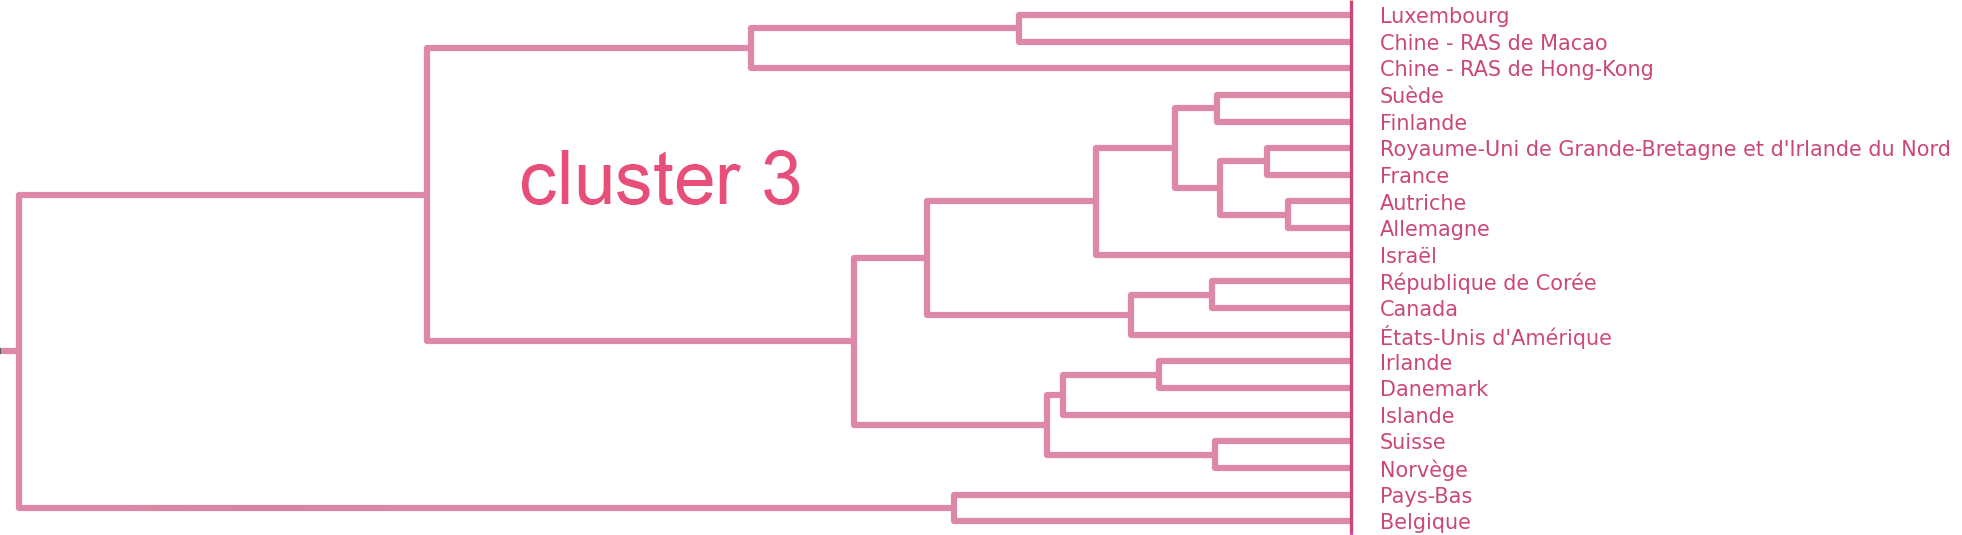

Pays d'Europe de l'ouest en majorité, PIB elevé par habitant, distance/France faible, disponibilités alimentaires elevées, consommation de viande elevée, évolution de la population faible, et fort dépendance à l'importation.

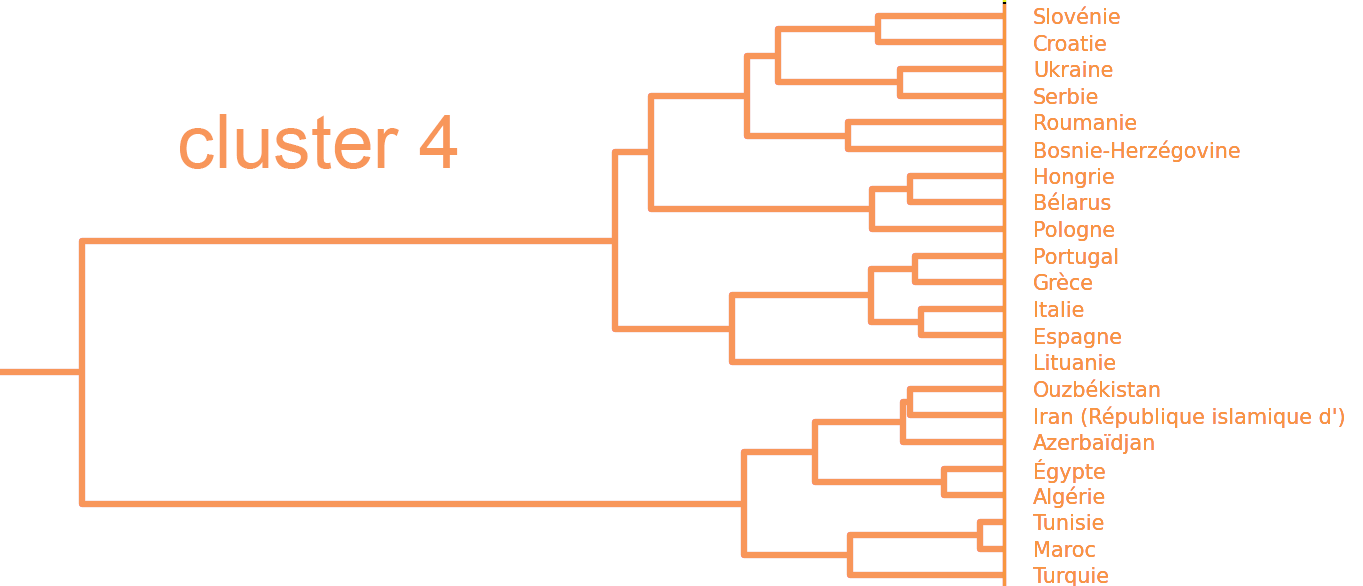

Pays d'europe de l'est en majorité, PIB moyennement faible par habitant, distance/France faible, disponibilités alimentaires elevées, consommation de viande modérée, évolution de la population faible, et dépendance à l'importation modérée.

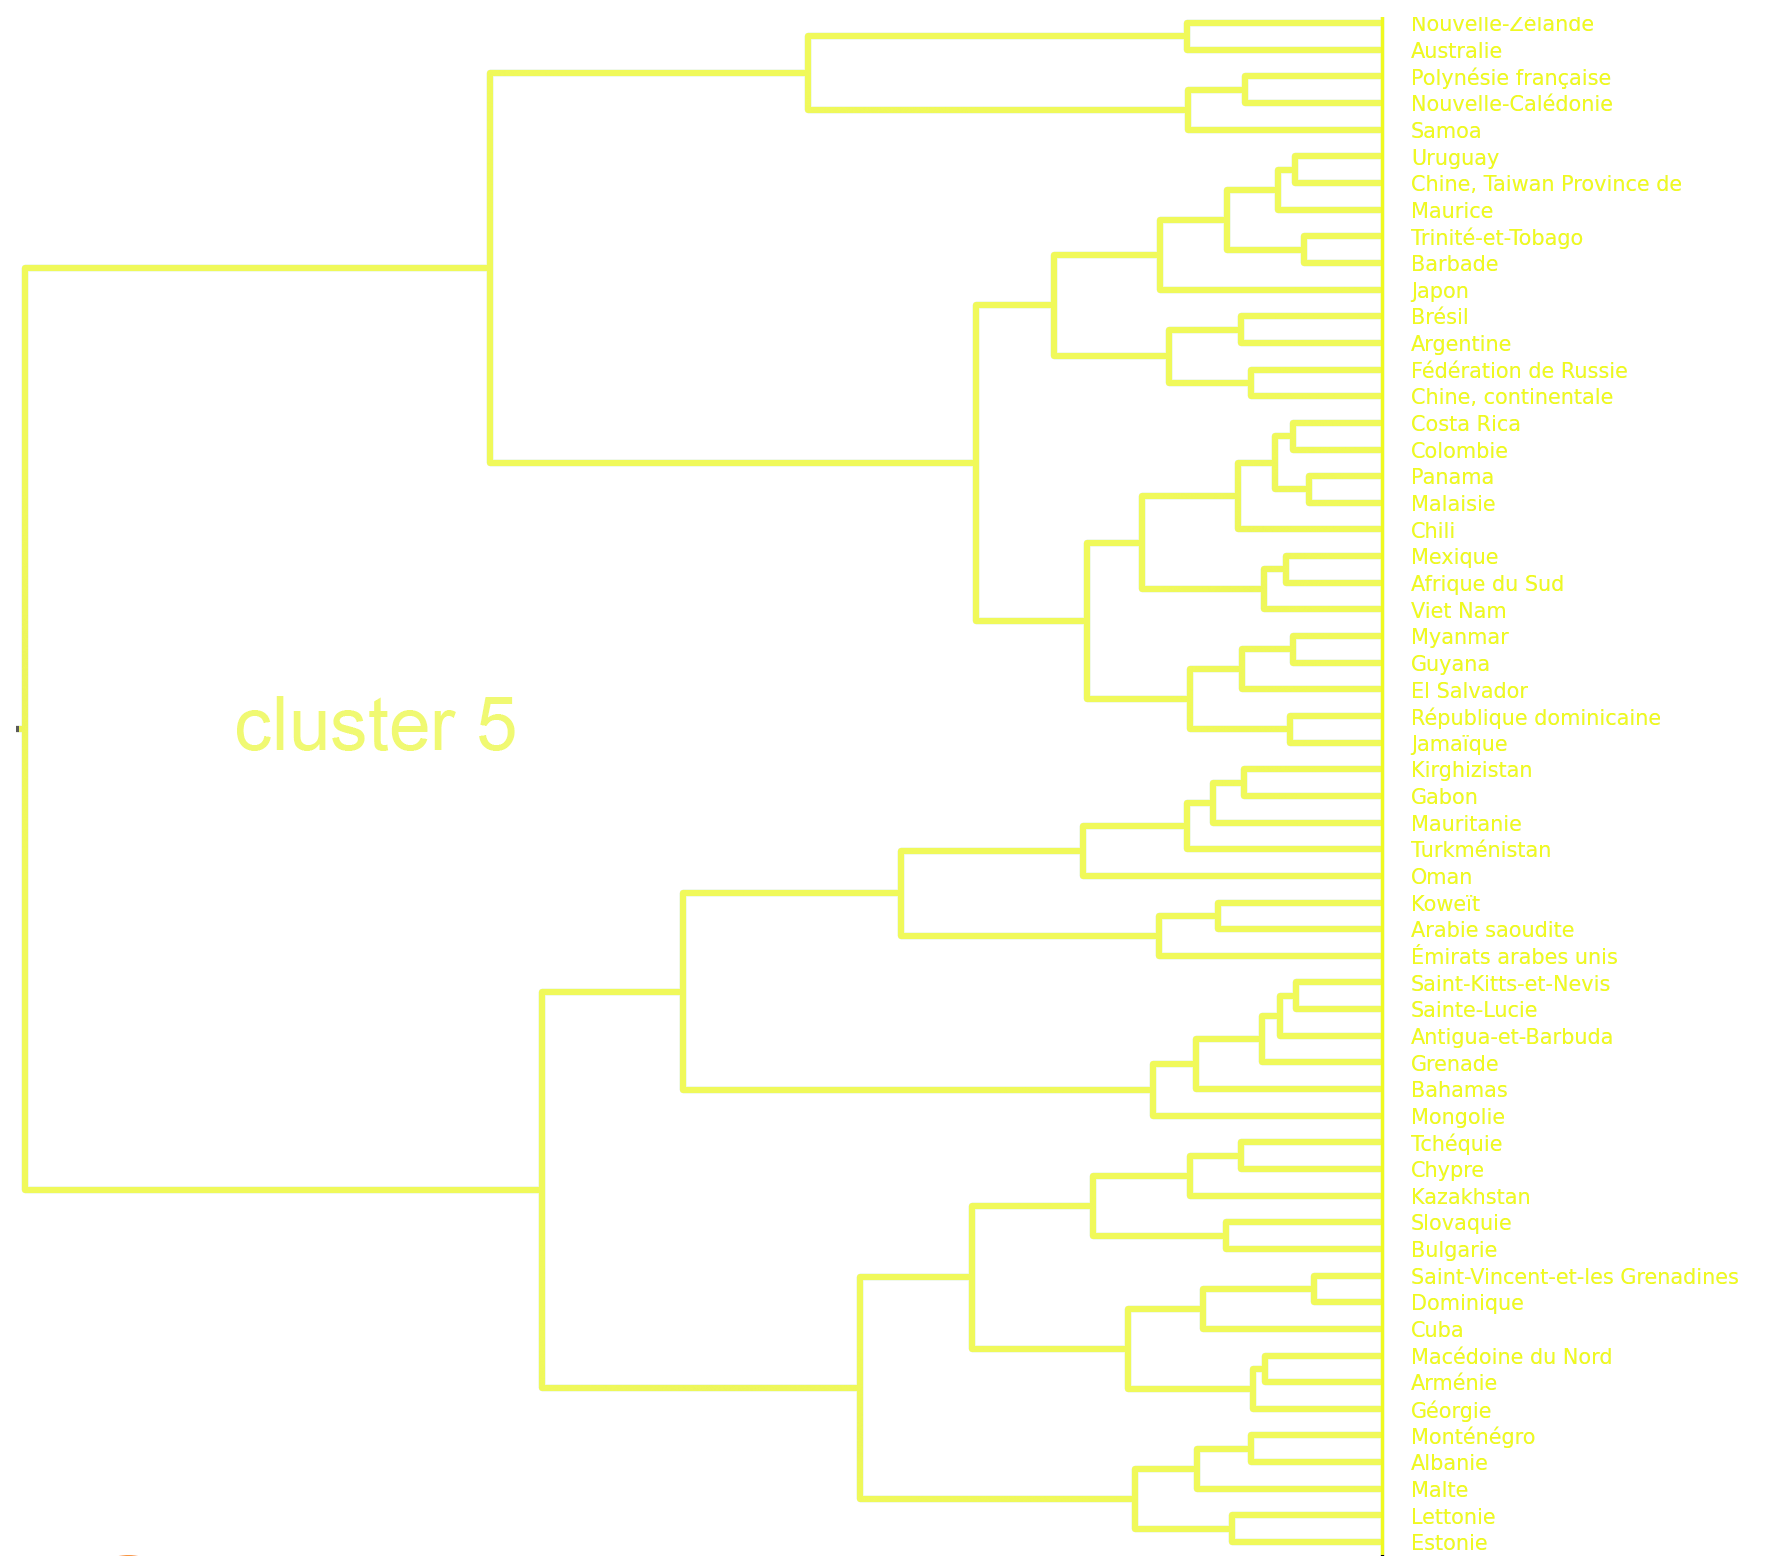

Pays du nord de l'Asie et d'Amerique du sud, faible PIB par habitant, distance/France elevée, disponibilités alimentaires moyennement elevées, consommation de viande moyennement elevée, évolution de la population faible, et dépendance à l'importation moyennement elevée.

## choix du cluster cible

Les pays du cluster 3 se dégagent clairement parmis les autres pays des clusters, ils possèdent un PIB supérieur, une distance par rapport à la France faible, des disponibilités alimentaires elevées, un taux d'indépendance aux importations de volaille elevé, et une consommation de viandre elevée.